,tipo_sujeto,genero,condicion,region,neurotransmisor,presion
0,S02,F,control,amigdala,dopamina,0.544347
1,S03,F,control,cortex prefrontal,serotonina,0.395321
2,S03,M,control,amigdala,serotonina,0.595409
3,S02,F,experimental,amigdala,serotonina,1.927793
4,S02,M,control,amigdala,dopamina,1.480024


genero
M    102
F     98
Name: count, dtype: int64

condicion
experimental    106
control          94
Name: count, dtype: int64

region
hipocampo            74
amigdala             69
cortex prefrontal    57
Name: count, dtype: int64

neurotransmisor
serotonina    101
dopamina       99
Name: count, dtype: int64

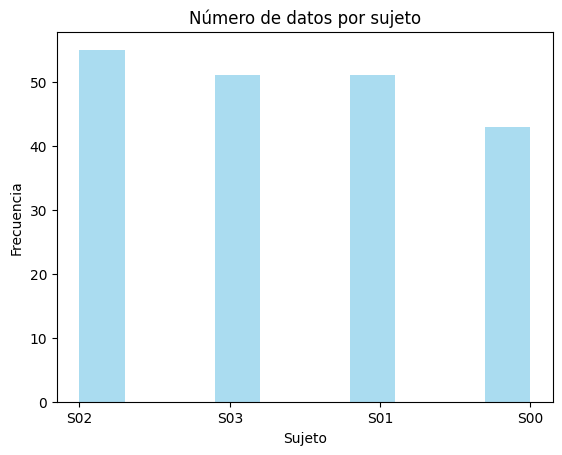

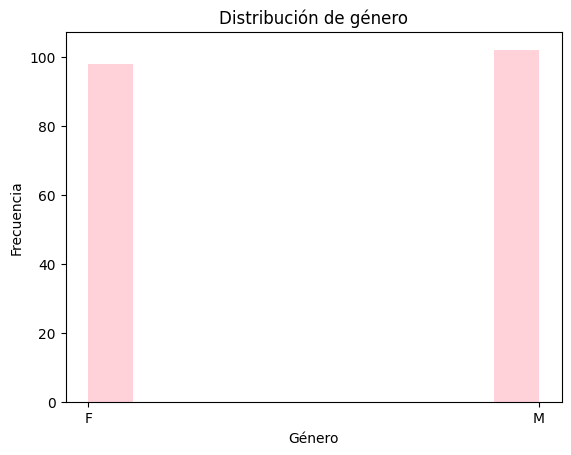

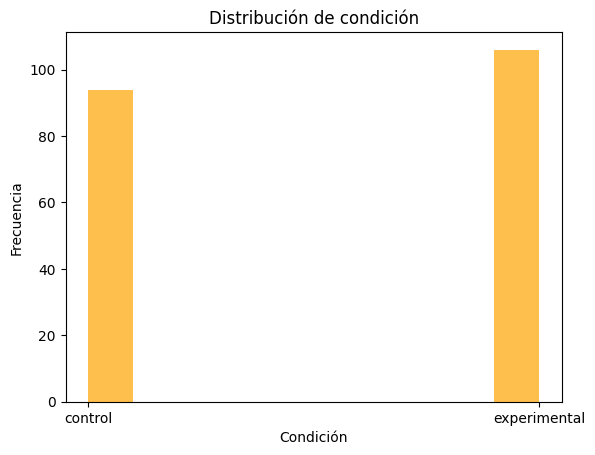

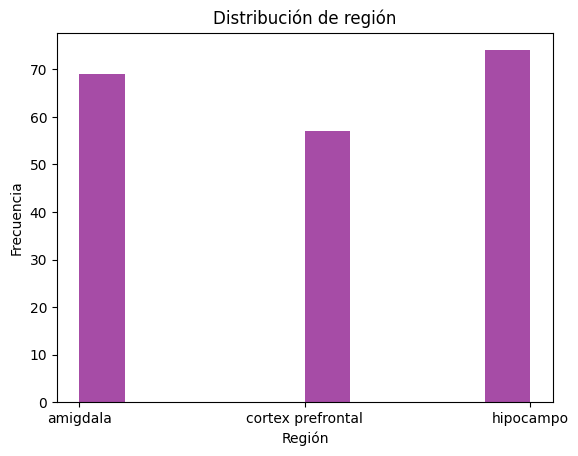

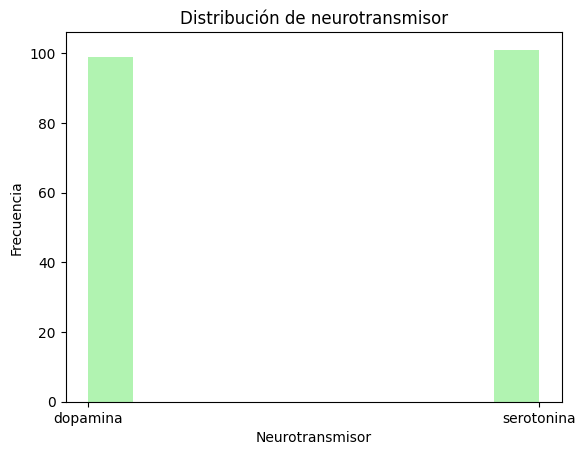

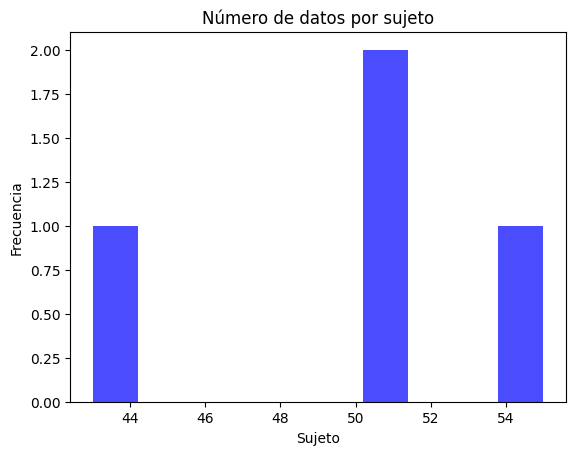

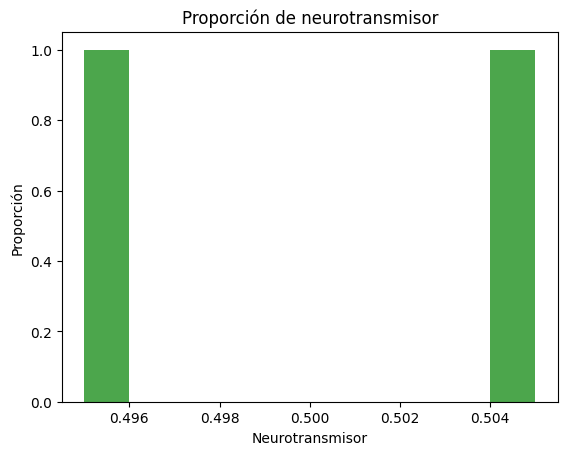

In [1]:
#Crea un DataFrame con 200 filas que contenga las columnas tipo_sujeto, género, condición, región y neurotransmisor, cada una con valores generados de forma aleatoria. Agrega una columna adicional llamada presión, cuyos datos sigan una distribución normal con media de 0.92 y desviación estándar de 0.8. Este DataFrame simula los resultados de un estudio en el que se evalúan variables cognitivas y fisiológicas en diferentes regiones cerebrales, considerando distintos sujetos y condiciones experimentales



import numpy as np
import pandas as pd

longitud = 200
tipos_sujetos = ['S' + str(i).zfill(2) for i in range(4)]

ops_sujetos = np.random.randint(len(tipos_sujetos), size=longitud)
col_sujetos = [tipos_sujetos[i] for i in ops_sujetos]


generos = ['M', 'F']
ops_generos = np.random.randint(len(generos), size=longitud)
col_generos = [generos[i] for i in ops_generos]


condicion = ['control', 'experimental']
ops_cond = np.random.randint(len(condicion), size=longitud)
col_cond = [condicion[i] for i in ops_cond]


region = ['hipocampo', 'cortex prefrontal', 'amigdala']
ops_region = np.random.randint(len(region), size=longitud)
col_region = [region[i] for i in ops_region]


neurotransmisores = ['dopamina', 'serotonina']
ops_neuro = np.random.randint(len(neurotransmisores), size=longitud)
col_neuro = [neurotransmisores[i] for i in ops_neuro]


col_presion = np.random.normal(loc=0.92, scale=0.8, size=longitud)


df = pd.DataFrame({
    "tipo_sujeto": col_sujetos,
    "genero": col_generos,
    "condicion": col_cond,
    "region": col_region,
    "neurotransmisor": col_neuro,
    "presion": col_presion
})

display(df.head())

display(df["genero"].value_counts())
display(df["condicion"].value_counts())
display(df["region"].value_counts())
display(df["neurotransmisor"].value_counts())


#generar el histograma de cuantos datos por sujeto se tiene, mostrar histograma la proporcion de neurotransmisor.

import matplotlib.pyplot as plt

plt.hist(df["tipo_sujeto"], color="skyblue", alpha=0.7)
plt.xlabel("Sujeto")
plt.ylabel("Frecuencia")
plt.title("Número de datos por sujeto")
plt.show()

plt.hist(df["genero"], color="pink", alpha=0.7)
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.title("Distribución de género")
plt.show()

plt.hist(df["condicion"], color="orange", alpha=0.7)
plt.xlabel("Condición")
plt.ylabel("Frecuencia")
plt.title("Distribución de condición")
plt.show()

plt.hist(df["region"], color="purple", alpha=0.7)
plt.xlabel("Región")
plt.ylabel("Frecuencia")
plt.title("Distribución de región")
plt.show()

plt.hist(df["neurotransmisor"], color="lightgreen", alpha=0.7)
plt.xlabel("Neurotransmisor")
plt.ylabel("Frecuencia")
plt.title("Distribución de neurotransmisor")
plt.show()

plt.hist(df["tipo_sujeto"].value_counts(), color="blue", alpha=0.7)
plt.xlabel("Sujeto")
plt.ylabel("Frecuencia")
plt.title("Número de datos por sujeto")
plt.show()

proporcion_neuro = df["neurotransmisor"].value_counts(normalize=True)
plt.hist(proporcion_neuro, color="green", alpha=0.7)
plt.xlabel("Neurotransmisor")
plt.ylabel("Proporción")
plt.title("Proporción de neurotransmisor")
plt.show()

condicion,control,experimental
tipo_sujeto,,
S00,0.465116,0.534884
S01,0.509804,0.490196
S02,0.509091,0.490909
S03,0.392157,0.607843


,maximo,minimo,media
tipo_sujeto,,,
S00,2.201506,-1.495434,0.820815
S01,2.061331,-0.914789,0.794401
S02,2.436163,-1.404415,0.820026
S03,2.241243,-1.159801,0.800185


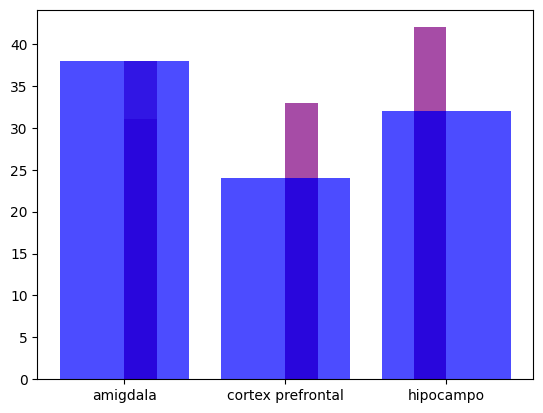

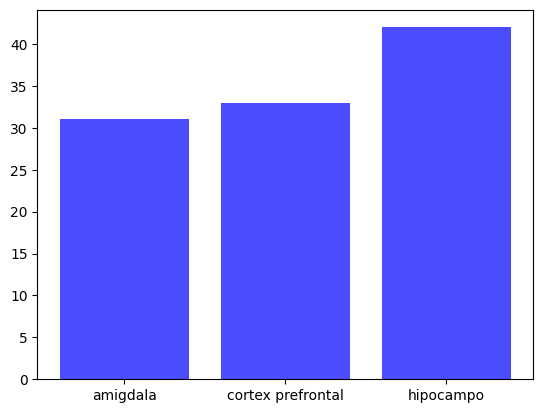

In [2]:
#Tarea
#Para cada sujeto, sacar la proporción del tipo de condición
tabla_prop = df.groupby("tipo_sujeto")["condicion"].value_counts(normalize=True).unstack().fillna(0)
display(tabla_prop)

#Para cada sujeto, calcular el máximo, el mínimo y la media de su presión

maximos = df.groupby("tipo_sujeto")["presion"].max()
minimos = df.groupby("tipo_sujeto")["presion"].min()
medias = df.groupby("tipo_sujeto")["presion"].mean()

presion_3m = pd.DataFrame({
    "maximo": maximos,
    "minimo": minimos,
    "media": medias
})

display(presion_3m)

#Para cada condición, hacer el histograma de las regiones activadas
#Hacerlo mediante 2 métodos: filtrado de dataframes y usando groupby
#1
for cond in df["condicion"].unique():
    datos = df[df["condicion"] == cond]["region"]
    plt.hist(datos, color="purple", alpha=0.7)

    
#2
conteo = df.groupby(["condicion", "region"]).size().unstack(fill_value=0)

for cond in conteo.index:
    plt.bar(conteo.columns, conteo.loc[cond], color="blue", alpha=0.7)
    plt.show()